In [1]:
import re
import datetime
from glob import glob 
import seaborn as sns 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns 
from method import * 

file_paths = glob('/Volume/VAD/LifeLongerAD_cu121/results/*/MVTecAD/*/seed_42/DriftMonitor.log/DriftMonitor.log')

results = {fp.split('/')[-6]+'-' + fp.split('/')[-4] : parse_log_file(fp) for fp in file_paths}

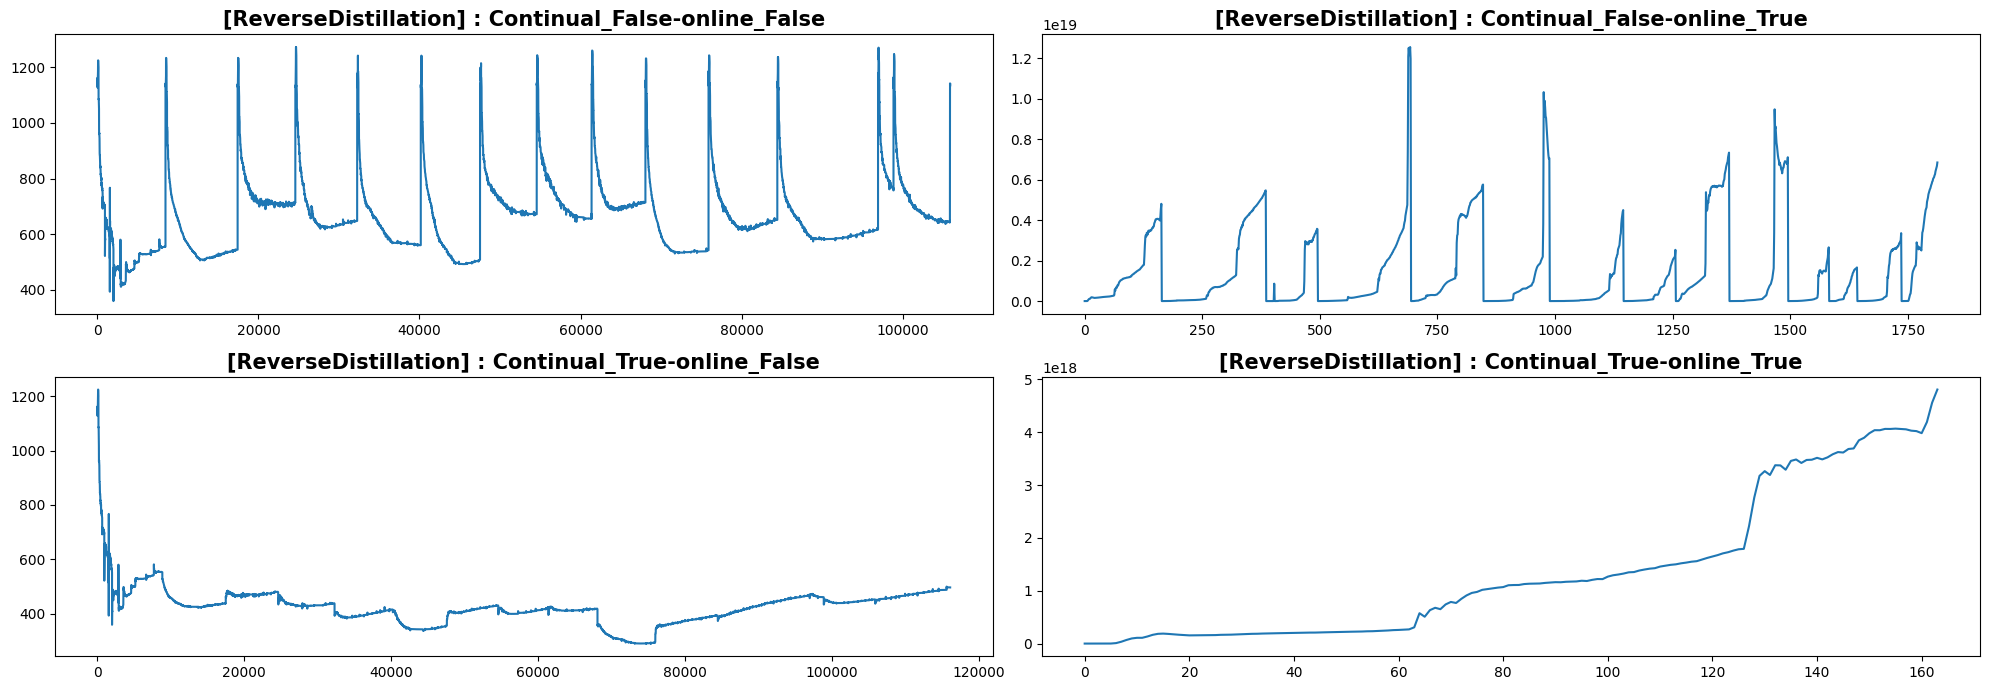

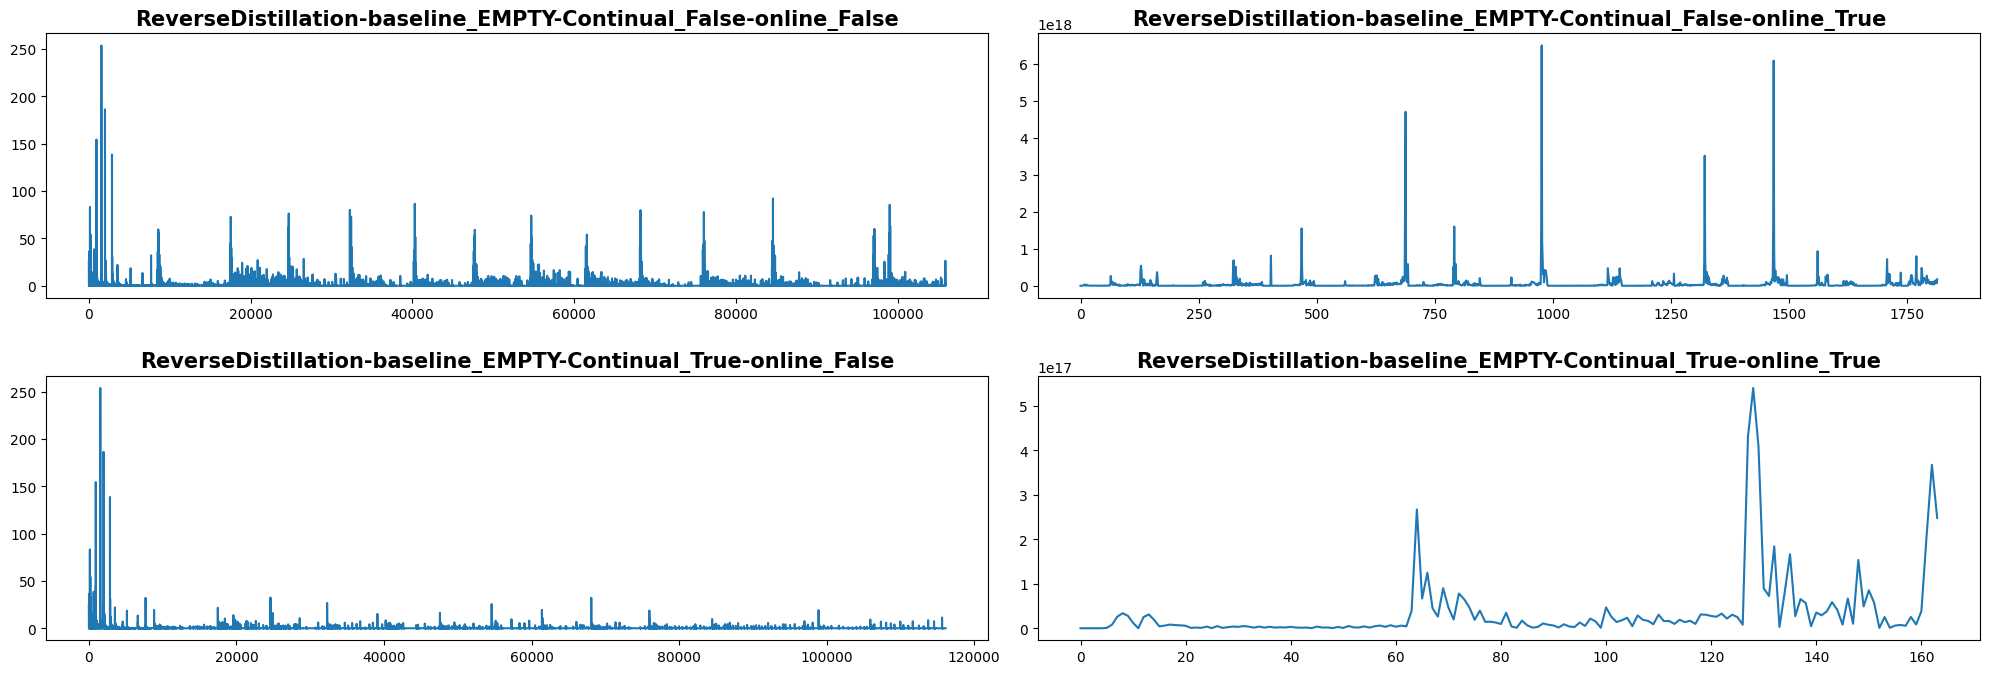

In [5]:
# method = ['ConvAutoencoder','ReverseDistillation','IUF','FastFlow']
method = ['ReverseDistillation']
exp = ['Continual_False-online_False','Continual_False-online_True','Continual_True-online_False','Continual_True-online_True']
# exp = ['Continual_False-online_False','Continual_True-online_False']

fig, axes = plt.subplots(2,2 , figsize=(20, 7))
axes = axes.flatten() 
i = 0 
for e in exp: 
    for m in method:    
        key = f"{m}-baseline_EMPTY-{e}"
        data = results[key]
        
        sns.lineplot(data=data[0], ax=axes[i])
        axes[i].set_title(f"[{m}] : {e}",fontsize=15,weight='bold')
        
        widths = results[f"{m}-baseline_EMPTY-Continual_False-online_False"][1]
        widths = np.where(pd.Series(widths).map(float).values==1)[0]
        # for x in widths:
        #     axes[i].axvline(x=x, color='red', linestyle='dashed', alpha=0.7)
            
        # axes[i].set_yscale("log")
        i+=1
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(20, 7))
axes = axes.flatten() 
i = 0 
for e in exp: 
    for m in method:
        key = f"{m}-baseline_EMPTY-{e}"
        data = results[key]

        sns.lineplot(data=data[2], ax=axes[i])
        axes[i].set_title(key,fontsize=15,weight='bold')
        # axes[i].set_yscale("log")
        
        widths = results[f"{m}-baseline_EMPTY-Continual_False-online_False"][1]
        widths = np.where(pd.Series(widths).map(float).values==1)[0]
        # for x in widths:
        #     axes[i].axvline(x=x, color='red', linestyle='dashed', alpha=0.7)
        i+=1
plt.tight_layout()
plt.show()

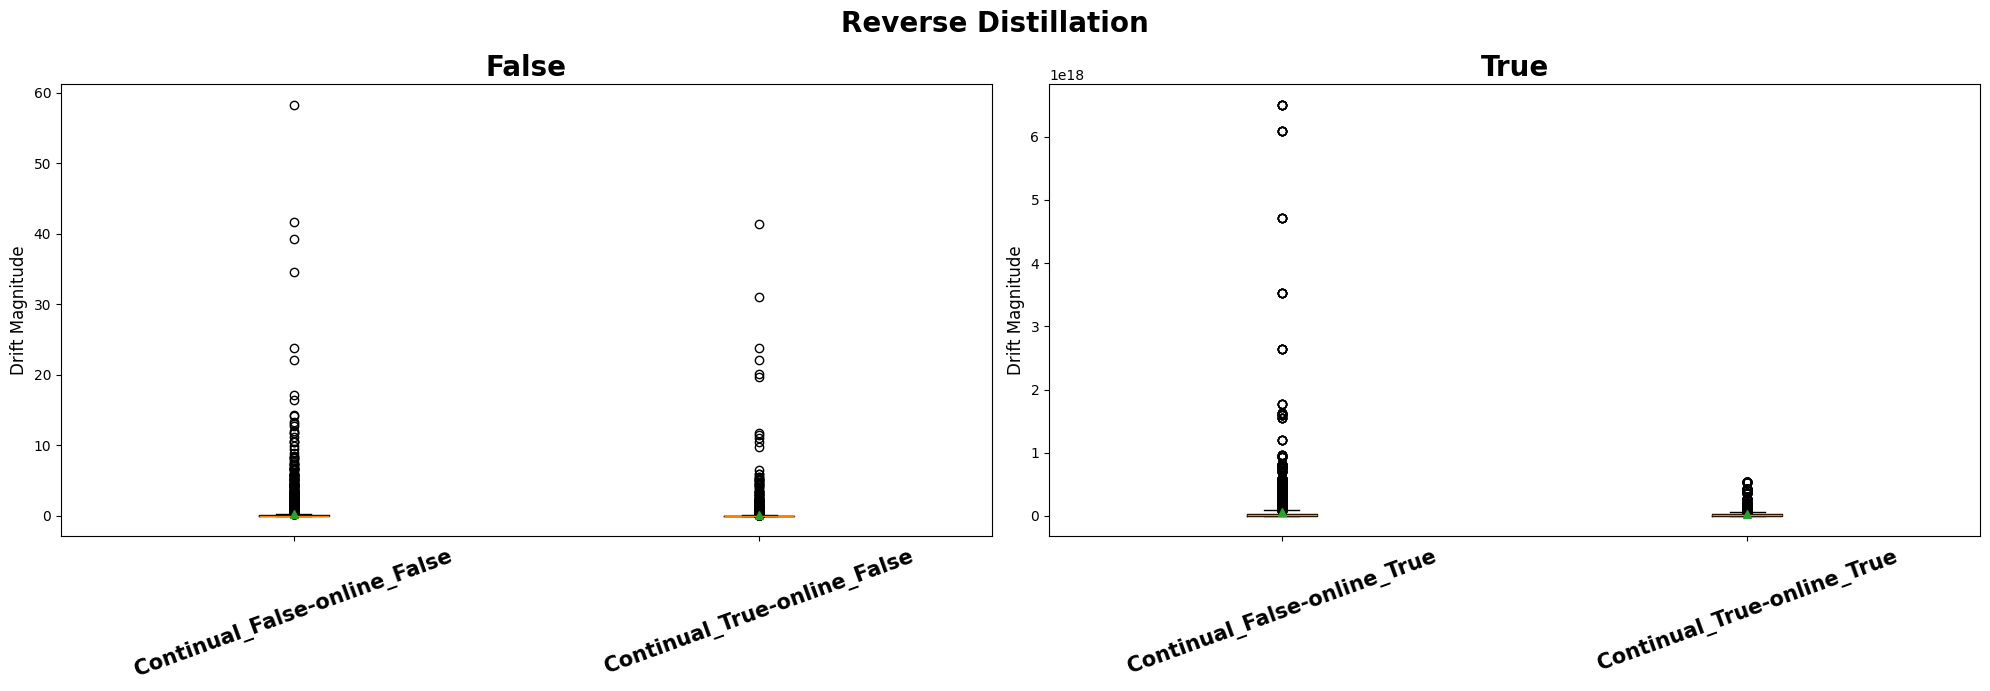

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비교할 모델 및 온라인/오프라인 모드 정의
methods = ['ReverseDistillation']
online_modes = ['False','True']
continual_modes = ['False','True']

# 1행 4열 서브플롯 생성 (각 모델별 비교)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes = axes.flatten()

# 각 모델에 대해 바이올린 플롯 그리기
for i, online in enumerate(online_modes):
    data_list = {}
    for continual in continual_modes:
        for method in methods:
            # 결과 딕셔너리에서 해당 키의 데이터 추출
            key = f"{method}-baseline_EMPTY-Continual_{continual}-online_{online}"
            v = results[key]
            # v[1]에 저장된 drift magnitude 데이터에서 등간격으로 1000개 샘플 선택
            indices = np.linspace(0, len(v[2]) - 1, 10000, endpoint=True).astype(int)
            mag = np.array(v[2])[indices]
            data_list[key] = mag

    # DataFrame 생성: 각 열은 Online True, Online False의 drift magnitude
    df = pd.DataFrame(data_list)
    
    # 바이올린 플롯 그리기 (violinplot은 DataFrame의 값 배열을 입력)
    axes[i].boxplot(df.values, showmeans=True)
    
    # 플롯 제목 및 축 설정
    axes[i].set_title(online, fontsize=20, weight='bold')
    axes[i].set_xticks(np.arange(1, len(df.columns) + 1))
    axes[i].set_xticklabels(
        pd.Series(data_list.keys()).apply(lambda x: '-'.join(x.split('-')[2:])),
        fontsize=15, rotation=20, weight='bold'
    )
    axes[i].set_ylabel('Drift Magnitude', fontsize=12)

fig.suptitle('Reverse Distillation',weight='bold',fontsize=20)
plt.tight_layout()
plt.show()

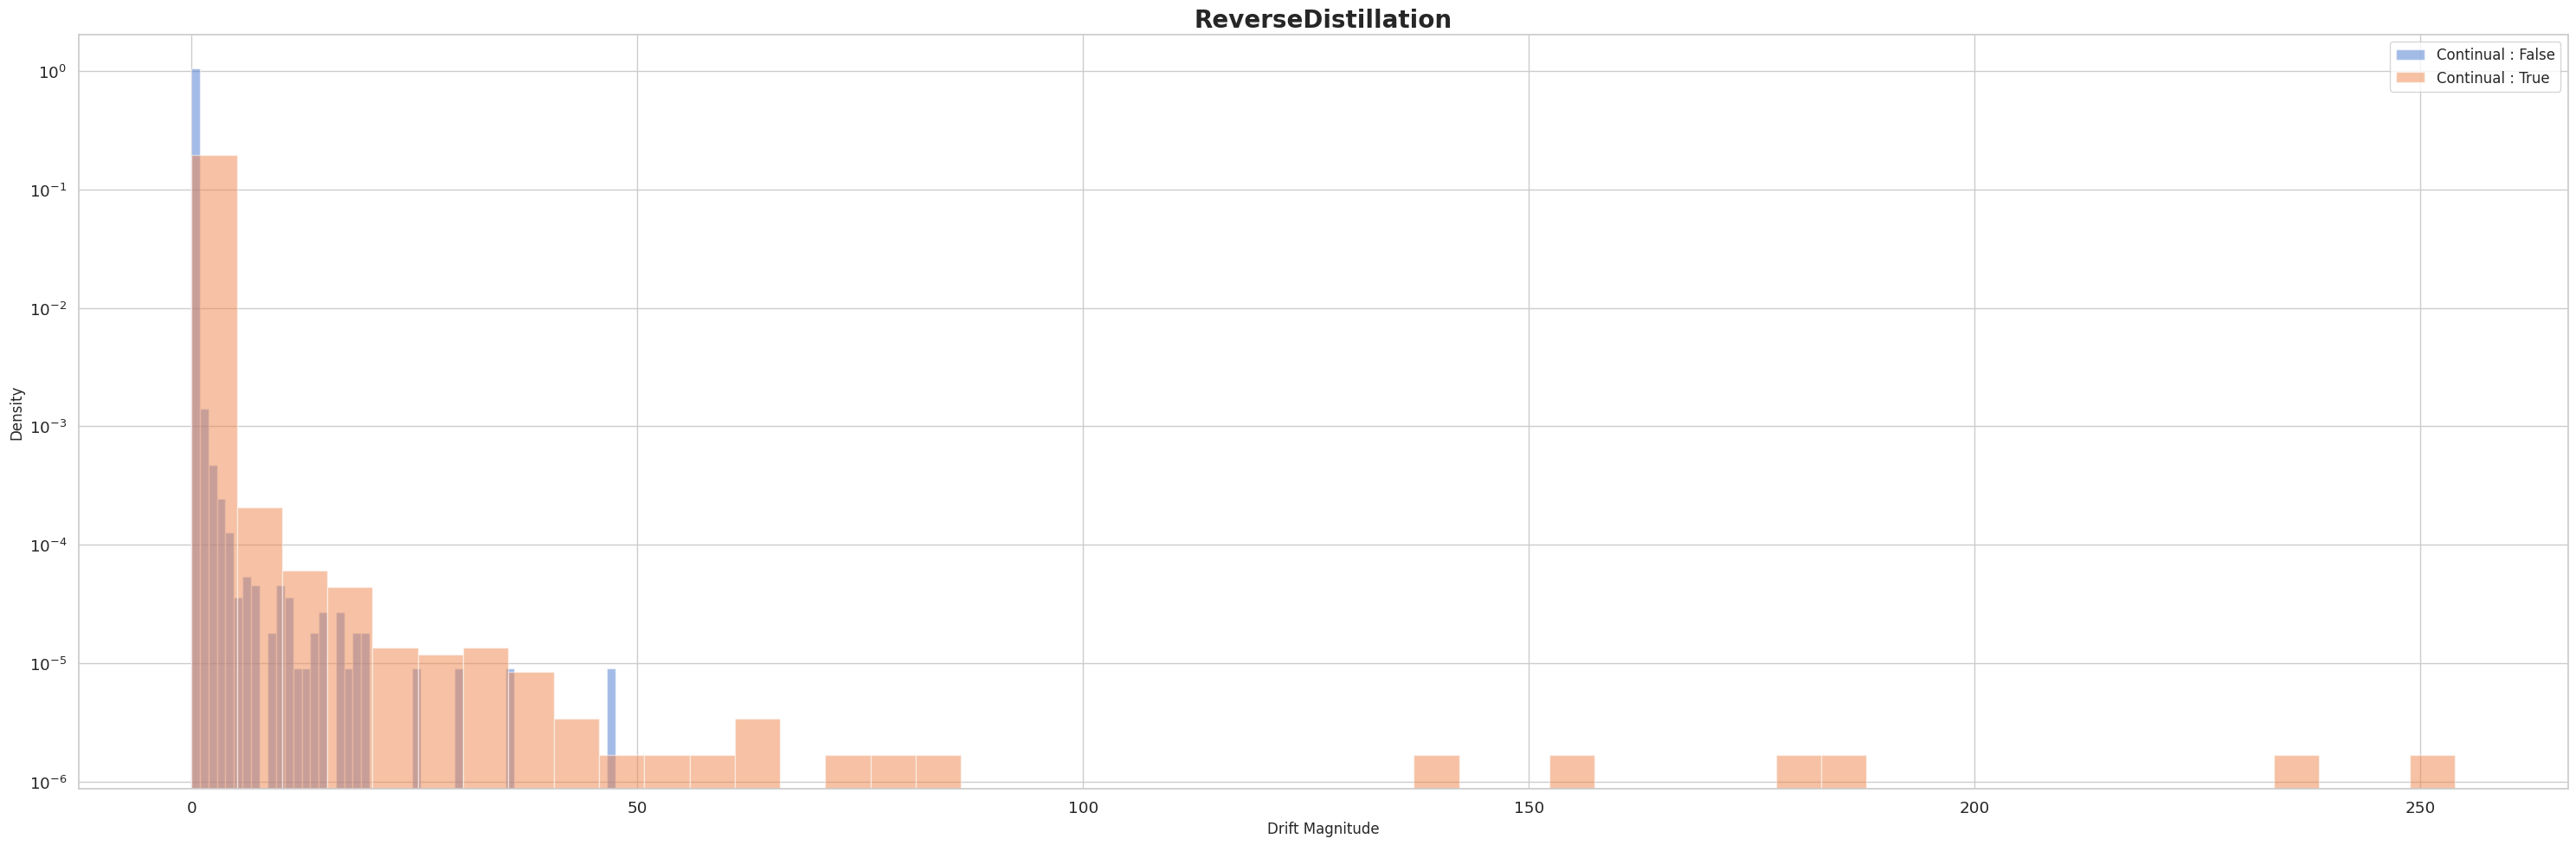

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비교할 모델 및 온라인/오프라인 모드 정의
methods = ['ReverseDistillation']
online_modes = ['False']
continual_modes = ['False','True']

# 2행 2열 서브플롯 생성 (각 학습 조건별 비교)
fig, axes = plt.subplots(1,1, figsize=(30, 10))  # 2x2 subplot 구성   
# axes = axes.flatten()
axes = [axes]

# 각 학습 조건에 대해 히스토그램을 그림
for i, method in enumerate(methods):
    # 히스토그램 데이터 수집
    for continual in continual_modes:
        key = f"{method}-baseline_EMPTY-Continual_{continual}-online_{online}"
        v = results[key]

        # v[1]에서 등간격으로 1000개 샘플 선택

        # 히스토그램 그리기 (alpha=0.5로 설정하여 여러 분포가 겹칠 경우 보이도록 함)
        axes[i].hist(v[2], bins=50, alpha=0.5, label=f"Continual : {continual}", density=True)

    # 플롯 제목 및 축 설정
    axes[i].set_yscale('log')  # y축을 로그 스케일로 변환
    axes[i].set_title(f"{method}", fontsize=20,weight='bold')
    axes[i].set_xlabel('Drift Magnitude', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend(fontsize=12)  # 범례 추가

# 전체 레이아웃 조정 후 플롯 표시
plt.tight_layout()
plt.show()
